# GIR19, reproduce Figs 1-4

## import modules

In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import os
import pandas as pd

## inputs

**4 files** are required to reproduce GIR19 figures:

- gb1900_gazetteer_complete_july_2018.csv
- all_wikigazetteer.pkl
- brit_wikigazetteer.pkl
- gold_standard.pkl

---

Directory structure:

```
├── GIR19_figs.ipynb
├── files
    ├── all_wikigazetteer.pkl
    ├── brit_wikigazetteer.pkl
    ├── gb1900_gazetteer_complete_july_2018.csv
    └── gold_standard.pkl
```

In [2]:
# set path for input files
path_gb1900 = "./files/gb1900_gazetteer_complete_july_2018.csv"
path_all_wikigazetteer = "./files/all_wikigazetteer.pkl"
path_brit_wikigazetteer = "./files/brit_wikigazetteer.pkl"
path_gold_standard = "./files/gold_standard.pkl"

## Read GB1900

In [5]:
with open(path_gb1900, encoding='UTF-16') as f:
    df = pd.read_csv(f)

In [6]:
df.head()

,pin_id,final_text,nation,local_authority,parish,osgb_east,osgb_north,latitude,longitude,notes
0,52b34d8b695fe90005004e1e,F. P.,Wales,Powys,Llansilin,320836.712742,327820.182715,52.842050,-3.176744,NaN
1,5800a6b92c66dcab3d061796,Parly. & Munl Boro. By.,England,City of London,NaN,531794.825962,180705.741898,51.509918,-0.102246,NaN
2,5800a6782c66dcab3d061786,S. Ps.,England,City of London,NaN,531736.217116,180725.027730,51.510105,-0.103083,NaN
3,57f684f42c66dcab3d01c0dd,Southwark Bridge Stairs,England,City of London,NaN,532199.584123,180696.934434,51.509744,-0.096420,NaN
4,57f685002c66dcab3d01c0e9,St. Paul's Pier,England,City of London,NaN,531987.486097,180745.664556,51.510232,-0.099456,NaN


## Read Wikipedia Gazetteers and Gold standard

In [7]:
wiki_all = pd.read_pickle(path_all_wikigazetteer)
wiki_brit = pd.read_pickle(path_brit_wikigazetteer)
gold_standard = pd.read_pickle(path_gold_standard)

## Create lists of lats/lons using GB1900, Wikipedia Gazetteer and gold standard

In [8]:
# GB1900
lats2plot_gb1900 = df["latitude"].tolist()
lons2plot_gb1900 = df["longitude"].tolist()

In [9]:
# Wikipedia (all)
lats2plot_all_gazetteer = wiki_all["wiki_lat"].tolist()
lons2plot_all_gazetteer = wiki_all["wiki_lon"].tolist()

In [10]:
# Wikipedia (Britain)
lats2plot_brit_gazetteer = wiki_brit["wiki_lat"].tolist()
lons2plot_brit_gazetteer = wiki_brit["wiki_lon"].tolist()

In [11]:
# Gold Standards (manually annotated)
lats2plot_gold = gold_standard["wiki_lat"].tolist()
lons2plot_gold = gold_standard["wiki_lon"].tolist()

In [12]:
print("Number of entries:")
print("#GB1900:                {}".format(len(lats2plot_gb1900)))
print("#Wiki Gazetteer:        {}".format(len(lats2plot_all_gazetteer)))
print("#Wiki Gazetteer (Brit): {}".format(len(lats2plot_brit_gazetteer)))
print("#Gold standards:        {}".format(len(lats2plot_gold)))

Number of entries:
#GB1900:                2552459
#Wiki Gazetteer:        1461606
#Wiki Gazetteer (Brit): 195805
#Gold standards:        950


## Figure 1 (left): Manually detected locations, scale:  the British Isles

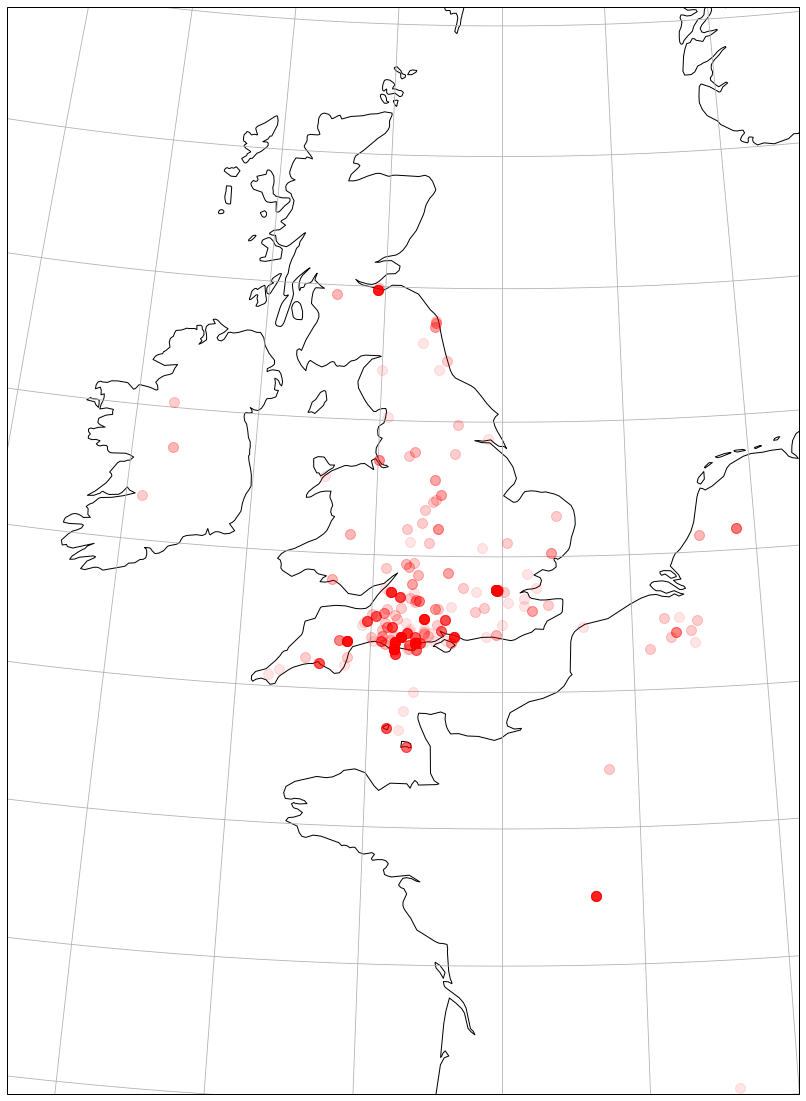

In [13]:
# min_lon, max_lon, min_lat, max_lat
map_extent = [-10, 6, 44, 60]

myfig, myaxes = plt.subplots(figsize=(20, 20))

# Projection
ax = plt.axes(projection=ccrs.Orthographic(0, 40))
ax.plot(np.array(lons2plot_gold), 
        np.array(lats2plot_gold),
        marker='o',
        ls=' ',
        color="r",
        markersize=10,
        alpha=0.1,
        transform=ccrs.PlateCarree()
       )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=1.0)

plt.grid()
plt.savefig("fig1_left.pdf", format="pdf")

## Figure 1 (right): Manually detected locations, scale:  Dorset

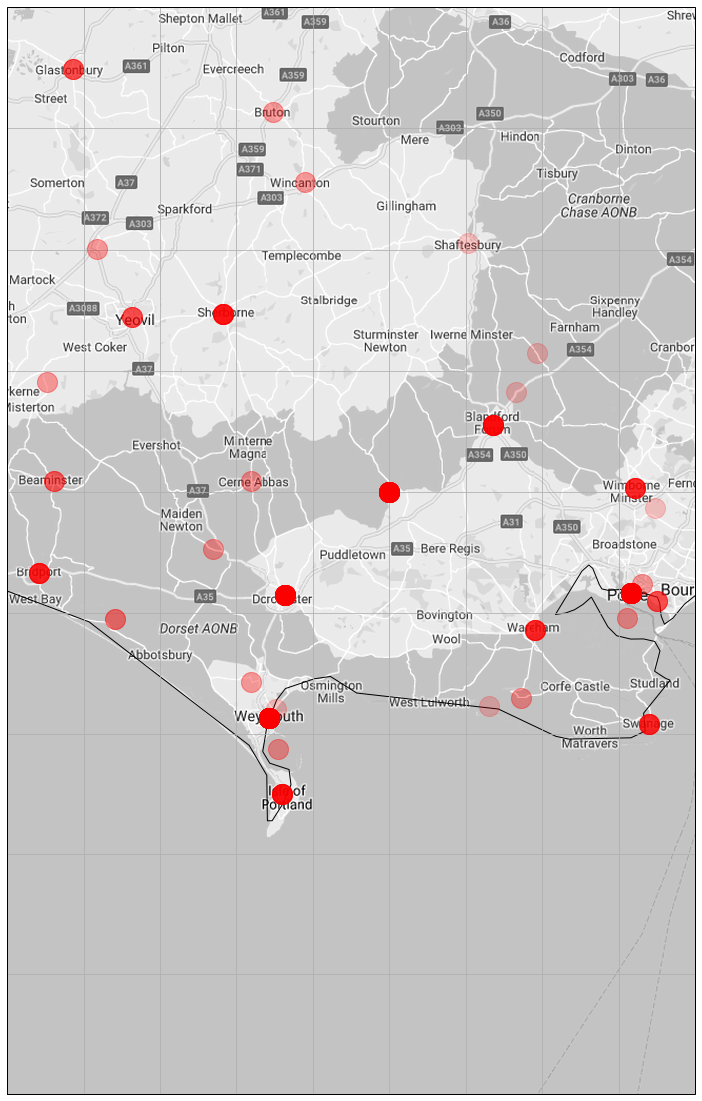

In [14]:
# min_lon, max_lon, min_lat, max_lat
map_extent = [-2.8, -1.9, 50.3, 51.2]

fig, ax = plt.subplots(figsize=(20, 20))

# Projection
request = cimgt.GoogleTiles(desired_tile_form='L', style='street')
ax = plt.axes(projection=request.crs)
ax.set_extent(map_extent)
ax.add_image(request, 10, interpolation='spline36', cmap='gray')


ax.plot(np.array(lons2plot_gold), 
        np.array(lats2plot_gold),
        marker='o',
        ls=' ',
        color="r",
        markersize=20,
        alpha=0.2,
        transform=ccrs.PlateCarree()
       )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='10m', linewidth=1.0)
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
ax.add_feature(land_10m, color='gray', zorder=0, edgecolor='black')

plt.grid()
plt.savefig("fig1_right.pdf", format="pdf")

## Figure 2: All geotagged articles in WikiGazetteer

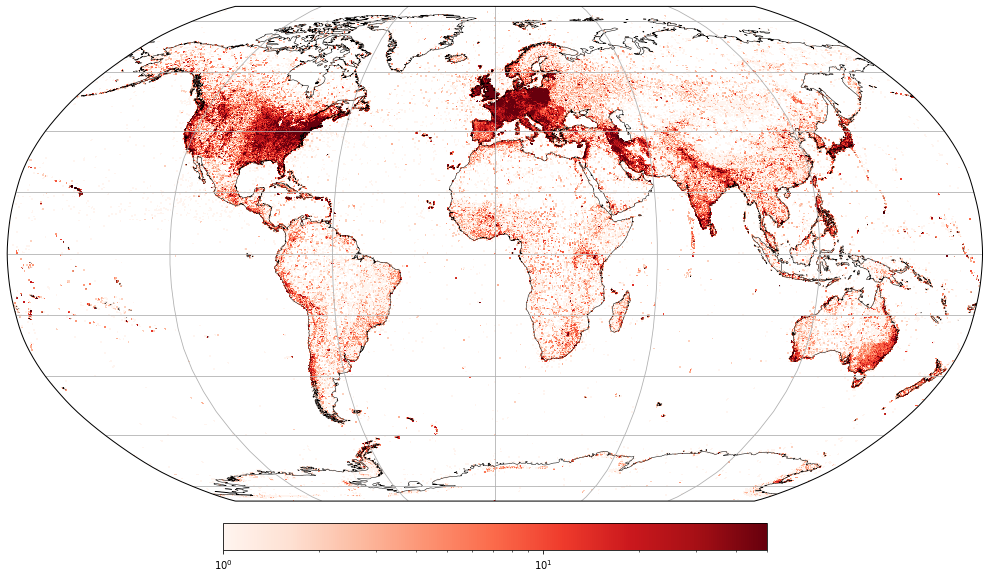

In [15]:
myfig, myaxes = plt.subplots(figsize=(20, 10))

# Projection
ax = plt.axes(projection=ccrs.Robinson(0))

myimage = ax.hist2d(np.array(lons2plot_all_gazetteer), 
                    np.array(lats2plot_all_gazetteer),
                    bins=(180*8, 90*8),
                    range=[[-180, 180], [-90, 90]],
                    cmap="Reds",
                    vmin=1,
                    vmax=50,
                    norm=LogNorm(),
                    transform=ccrs.PlateCarree()
                   )

ax.set_global()
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=0.5)
myfig.colorbar(myimage[3], orientation='horizontal', fraction=0.05, pad=0.04)

plt.grid()
plt.savefig("fig2.pdf", format="pdf")

## Figure 3 (left):  GB1900 in the British Isles

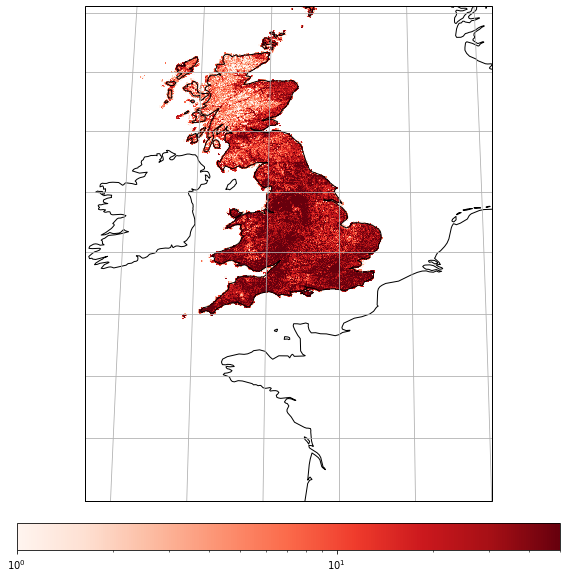

In [16]:
# min_lon, max_lon, min_lat, max_lat
map_extent = [-10, 6, 44, 60]

myfig, myaxes = plt.subplots(figsize=(20, 10))

# Projection
ax = plt.axes(projection=ccrs.Robinson(0))

myimage = ax.hist2d(np.array(lons2plot_gb1900), 
                    np.array(lats2plot_gb1900),
                    bins=(180*100, 90*100),
                    range=[[-180, 180], [-90, 90]],
                    cmap="Reds",
                    vmin=1,
                    vmax=50,
                    norm=LogNorm(),
                    transform=ccrs.PlateCarree()
                   )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=1.0)
myfig.colorbar(myimage[3], orientation='horizontal', fraction=0.05, pad=0.04)

plt.grid()
plt.savefig("fig3_left.png", format="png", dpi=900)

## Figure 3 (right):  WikiGazetteer in the British Isles

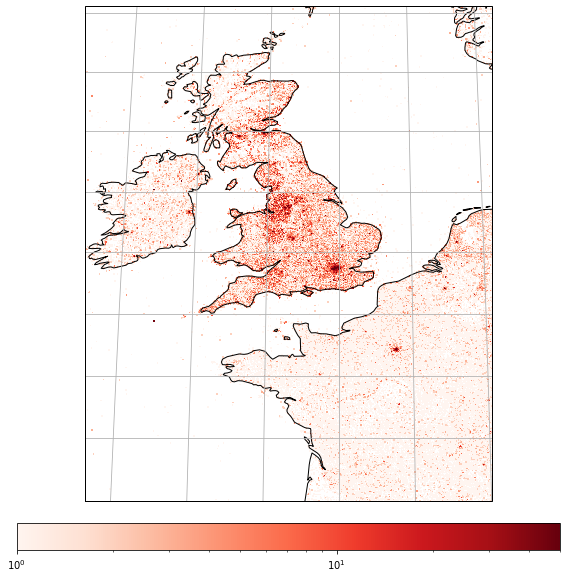

In [17]:
# min_lon, max_lon, min_lat, max_lat
map_extent = [-10, 6, 44, 60]

myfig, myaxes = plt.subplots(figsize=(20, 10))

# Projection
ax = plt.axes(projection=ccrs.Robinson(0))

myimage = ax.hist2d(np.array(lons2plot_all_gazetteer), 
                    np.array(lats2plot_all_gazetteer),
                    bins=(180*100, 90*100),
                    range=[[-180, 180], [-90, 90]],
                    cmap="Reds",
                    vmin=1,
                    vmax=50,
                    norm=LogNorm(),
                    transform=ccrs.PlateCarree()
                   )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=1.0)
myfig.colorbar(myimage[3], orientation='horizontal', fraction=0.05, pad=0.04)

plt.grid()
plt.savefig("fig3_right.png", format="png", dpi=900)

## Figure 4 (left): GB1900 in Blandford Forum, Dorset

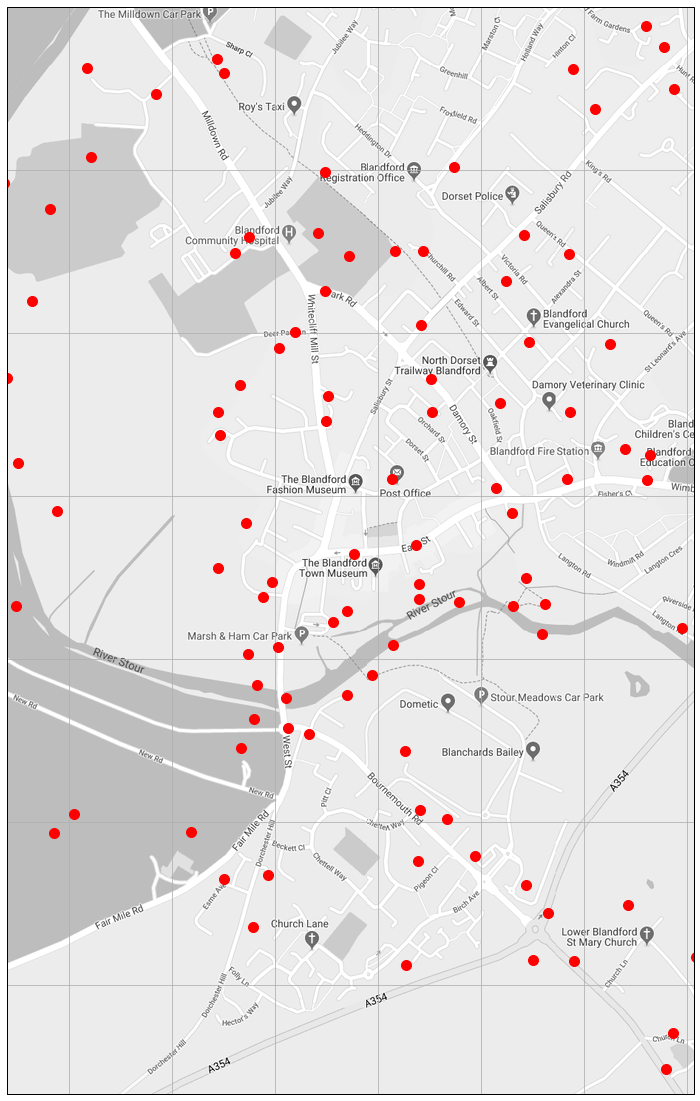

In [18]:
# Blandford Forum, map extent
center_lon = -2.1648
center_lat = 50.856
dx = dy = 0.01
map_extent = [center_lon - dx, center_lon + dx, center_lat - dy, center_lat + dy]

fig, ax = plt.subplots(figsize=(20, 20))

# Projection
request = cimgt.GoogleTiles(desired_tile_form='L', style='street')
ax = plt.axes(projection=request.crs)
ax.set_extent(map_extent)
ax.add_image(request, 16, interpolation='spline36', cmap='gray')

ax.plot(np.array(lons2plot_gb1900), 
        np.array(lats2plot_gb1900),
        marker='o',
        ls=' ',
        color="r",
        markersize=10,
        alpha=1.0,
        transform=ccrs.PlateCarree()
       )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='10m', linewidth=1.0)
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
ax.add_feature(land_10m, color='gray', zorder=0, edgecolor='black')

plt.grid()
plt.savefig("fig4_left.pdf", format="pdf")

## Figure 4 (right): WikiGazetteer in Blandford Forum, Dorset

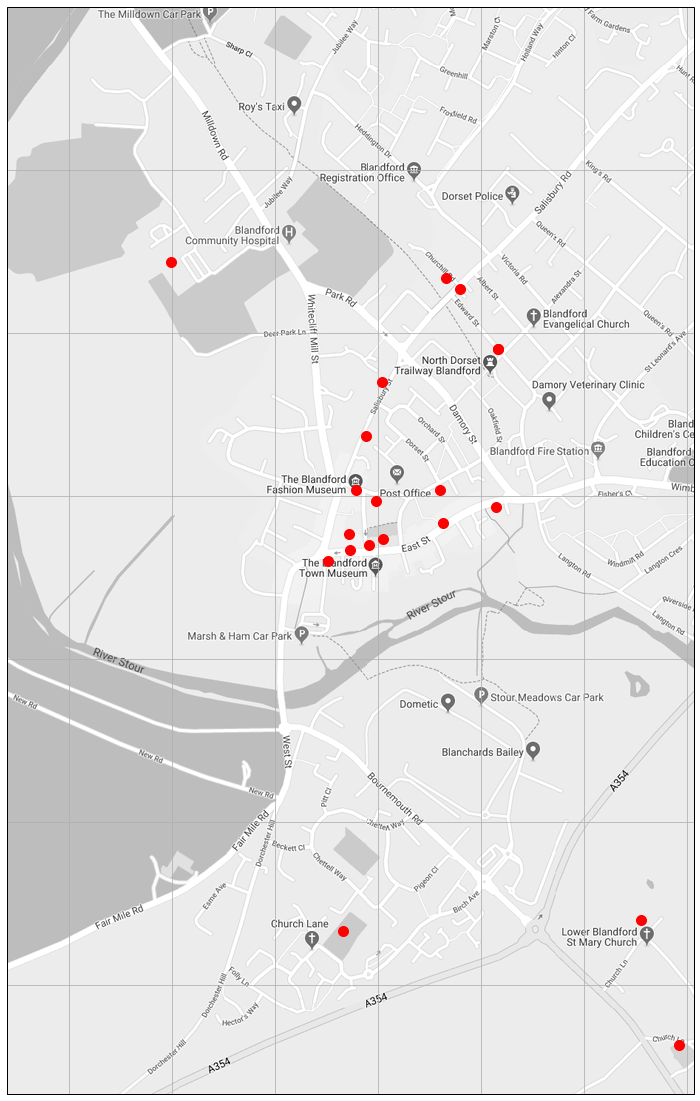

In [19]:
# Blandford Forum, map extent
center_lon = -2.1648
center_lat = 50.856
dx = dy = 0.01
map_extent = [center_lon - dx, center_lon + dx, center_lat - dy, center_lat + dy]

fig, ax = plt.subplots(figsize=(20, 20))

# Projection
request = cimgt.GoogleTiles(desired_tile_form='L', style='street')
ax = plt.axes(projection=request.crs)
ax.set_extent(map_extent)
ax.add_image(request, 16, interpolation='spline36', cmap='gray')

ax.plot(np.array(lons2plot_brit_gazetteer), 
        np.array(lats2plot_brit_gazetteer),
        marker='o',
        ls=' ',
        color="r",
        markersize=10,
        alpha=1.0,
        transform=ccrs.PlateCarree()
       )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='10m', linewidth=1.0)
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
ax.add_feature(land_10m, color='gray', zorder=0, edgecolor='black')

plt.grid()
plt.savefig("fig4_right.pdf", format="pdf")